In [20]:
#importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#importing the dataset
df = pd.read_csv('canada_per_capita_income.csv')

In [24]:
#checking the no.of rows and no.of columns
df.shape

(47, 2)

In [26]:
#getting the basic statistics about the dataset
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


In [27]:
#renaming the column names for my convenience
df.rename(columns={
    'year':'Year',
    'per capita income (US$)':'Per Capita Income'
},inplace=True)

In [28]:
#checking for any null values present in the dataset
df.isnull().sum()

,0
Year,0
Per Capita Income,0


<Axes: ylabel='Per Capita Income'>

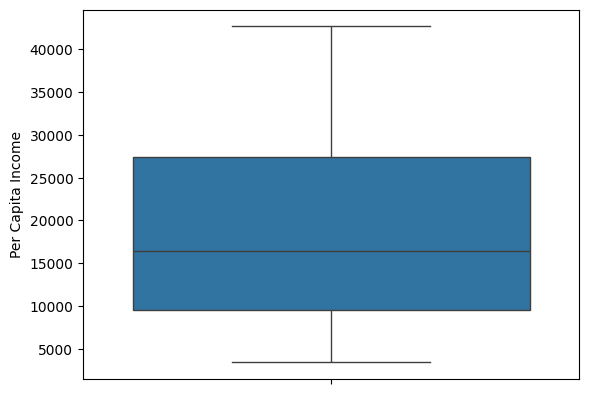

In [29]:
#checking for outliers in the dataset
sns.boxplot(df['Per Capita Income'])

In [30]:
#creating a predicting model for this dataset
from sklearn import linear_model

In [31]:
#creating a regression variable for linear regression method
reg = linear_model.LinearRegression()

In [33]:
#to split the data into training data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[['Year']],df['Per Capita Income'],test_size=0.2)

In [34]:
#now training the model using our training('labeled') data
reg.fit(x_train,y_train)

LinearRegression()

In [35]:
#now testing the model with the test data
reg.predict(x_test)

array([29907.7093372 , 22334.88481732, 14762.06029745, 28224.85944389,
        1299.261151  , 18969.18503071, 11396.36051083, 32431.98417716,
        9713.51061753,  2982.11104431])

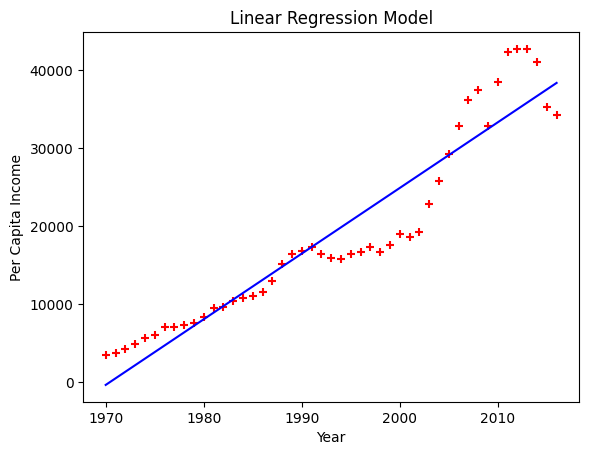

In [38]:
#now plotting the line that fits best with the dataset
plt.scatter(df['Year'],df['Per Capita Income'], color='red',marker='+')
plt.plot(df['Year'], reg.predict(df[['Year']]), color='blue')
plt.xlabel('Year')
plt.ylabel('Per Capita Income')
plt.title('Linear Regression Model')
plt.show()

In [39]:
#to check the score of our model
reg.score(x_test,y_test)

0.9323711331737485

In [40]:
#Our model is 93.24% accurate with the predictions, which is a very good score.

In [43]:
#to import joblib for savinvg this model
import joblib

In [45]:
#dumping the model as a separate file for future training and uses
joblib.dump(reg,'pci_model.joblib')

['pci_model.joblib']